# Experiments with Model Architecture using the MNIST Digits Data Set

Project Repository: https://github.com/albert-kepner/Week6_DL_FinalProject


For this project we are building a number of different models to classify the handwritten digits in the MNIST data set. This is a supervised learning multi-class classification problem. The performance of various models is compared for both accurcy on the test data and training run time. 


## Exploratory Data Analysis

This is a well-known data set of monochrome 28 by 28 pixel images of single handwritten digits 0-9. The data set is included in Keras. It is organized as 60,000 training images and 10,000 test images. No data cleaning is needed other than scaling the pixel values as floats in the range [0-1).

The functions we used to load the data set and more details are in a separate notbook here:

https://github.com/albert-kepner/Week6_DL_FinalProject/blob/master/Exploratory_Data_Analysis.ipynb

## Model Architectures

We will be comparing three types of models Keras sequential models for this classification problem:

1. Baseline Model -- Simple dense network with no hidden layers

1. Deeper Dense models -- comparing fully connected dense networks with 1, 2, 3, or 4 hidden layers and also varying the number of hidden units per layer.

1. Four variations on a convolutional neural network or CNN.

## Baseline Dense Model (no hidden layers)

This model is about the simplest possible Keras sequential model. It has just an input layer which takes a flattened vector of 784 pixel values, and an output layer of 10 units with softmax activation, since this is a 10 branch classification problem. Initially we will use SGD as the optimizer. The model is shown here for reference.

In [1]:

def create_baseline_model():
    DIGIT_CLASSES = 10
    RESHAPED = 28 * 28 ## 784 pixesl per image
    #build the model
    model = tf.keras.models.Sequential()
    model.add(keras.layers.Dense(DIGIT_CLASSES,
                                 input_shape=(RESHAPED,),
                                 name='dense_layer',
                                 activation='softmax'))
    return model

In [2]:
%run create_baseline_model.py
model = create_baseline_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Details of training this model are in a separate notebook here:

https://github.com/albert-kepner/Week6_DL_FinalProject/blob/master/Baseline_Dense_Model.ipynb
    
The results of 5 training sessions with 60000 samples for training and evaluation on the 10000 sample test set are shown below.
The test accuracy was about 0.922 and it was very repeatable across 5 training sessions with std = 0.000249. The average runtime was about 237 seconds. This test was using a GPU.

In [20]:
import pandas as pd
df = pd.read_csv('data/BASELINE_DATA_2022-09-30_18_38.csv')
display(df)
df.describe()

,training_time_sec,test_accuracy
0,233.948682,0.9223
1,232.309703,0.9221
2,240.762712,0.9222
3,231.556649,0.9221
4,245.934716,0.9227


,training_time_sec,test_accuracy
count,5.000000,5.000000
mean,236.902493,0.922280
std,6.222522,0.000249
min,231.556649,0.922100
25%,232.309703,0.922100
50%,233.948682,0.922200
75%,240.762712,0.922300
max,245.934716,0.922700


## Deeper Dense Models

Below is the model creation function. We used this to configure from 1 to 4 hidden layers and tried 64, 128, and 192 as the number of units per hidden layer.

In [4]:
def create_dense_model(hidden_layers=1, hidden_units_per_layer=128):
    """
    create a keras sequential model with the specified
    number of hidden_layers and number of units per layer
    """
    DIGIT_CLASSES = 10
    RESHAPED = 28 * 28 ## 784 pixels per image
    model = tf.keras.models.Sequential()
    count = 0
    
    
    count += 1
    model.add(keras.layers.Dense(units=hidden_units_per_layer,
        input_shape=(RESHAPED,),
        name=f'dense_layer_{count}', activation='relu'))
    
    for i in range(1, hidden_layers):
        count += 1
        model.add(keras.layers.Dense(units=hidden_units_per_layer,
           name=f'dense_layer_{count}', activation='relu'))
        
    count += 1        
    model.add(keras.layers.Dense(DIGIT_CLASSES,
       name=f'dense_layer_{count}', activation='softmax'))

    # summary of the model
    model.summary()
    return model

The model summarys for two of these configurations are show here:

In [5]:
%run create_dense_model.py
create_dense_model(hidden_layers=1, hidden_units_per_layer=64)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer_1 (Dense)       (None, 64)                50240     
                                                                 
 dense_layer_2 (Dense)       (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
create_dense_model(hidden_layers=4, hidden_units_per_layer=192)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer_1 (Dense)       (None, 192)               150720    
                                                                 
 dense_layer_2 (Dense)       (None, 192)               37056     
                                                                 
 dense_layer_3 (Dense)       (None, 192)               37056     
                                                                 
 dense_layer_4 (Dense)       (None, 192)               37056     
                                                                 
 dense_layer_5 (Dense)       (None, 10)                1930      
                                                                 
Total params: 263,818
Trainable params: 263,818
Non-trainable params: 0
_________________________________________________________________


## Deeper Dense Model Comparisons

We trained the above model with all 12 combinations of number of hidden layers {1,2,3,4} and number of units per hidden layer {64,128,192}. For each of these combinations we tried 3 variations:

* Optimizer=SGD, 
* Optimizer=Adam, 
* Optimizer=Adam with a Dropout layer added after each hidden layer 

So 36 model variations total. Each of these was run with a training set of 50,000 images, validation set of 10,000 images, and held out test set of 10,000 images. For each run we used early stopping based on validation loss, to avoid overfitting (and avoid wasted training time). All of these runs were done on a laptop and using a GPU.
For each run we captured the elapsed time for training and the accuracy score on the test images.

All of these models were more accurate than the baseline model describe above (test accuracy = 0.922). And the test accuracy of all the models was suprisingly close in a range from 0.966  to 0.980. However there was a huge difference in training times from 10.6 seconds to 312 seconds.

The best and worst models by training time and test accuracy are shown below:

In [21]:
## Which model configurations had the shortest and longest training times?
import pandas as pd
df = pd.read_csv('data/ALL_DENSE_MODELS.csv')

min_row = df.iloc[df['elapsed_time'].argmin(),:]
display(pd.DataFrame(min_row).T)
max_row = df.iloc[df['elapsed_time'].argmax(),:]
display(pd.DataFrame(max_row).T)

,hidden_layers,hidden_units_per_layer,elapsed_time,test_accuracy,model_type
17,2,192,10.560391,0.9767,Adam Optimizer


,hidden_layers,hidden_units_per_layer,elapsed_time,test_accuracy,model_type
2,1,192,311.766825,0.9762,SGD Optimizer


In [8]:
## Which model configuratons had the best and worst test accuracy?
max_row = df.iloc[df['test_accuracy'].argmax(),:]
display(pd.DataFrame(max_row).T)
min_row = df.iloc[df['test_accuracy'].argmin(),:]
display(pd.DataFrame(min_row).T)

,hidden_layers,hidden_units_per_layer,elapsed_time,test_accuracy,model_type
14,1,192,19.091164,0.9803,Adam Optimizer


,hidden_layers,hidden_units_per_layer,elapsed_time,test_accuracy,model_type
9,4,64,79.026243,0.9658,SGD Optimizer


More details summarizing model performance of the 36 configurations are here:
    
https://github.com/albert-kepner/Week6_DL_FinalProject/blob/master/Deeper_Dense_Models_Comparison.ipynb    

Notebooks used to train each type of dense model are here:
    
* https://github.com/albert-kepner/Week6_DL_FinalProject/blob/master/Deeper_Dense_Models_SGD.ipynb
* https://github.com/albert-kepner/Week6_DL_FinalProject/blob/master/Deeper_Dense_Models_Adam.ipynb
* https://github.com/albert-kepner/Week6_DL_FinalProject/blob/master/Deeper_Dense_Models_Adam_Dropout.ipynb

In [22]:
## Here is the full table of results for the deeper dense models
df

,hidden_layers,hidden_units_per_layer,elapsed_time,test_accuracy,model_type
0,1,64,226.860444,0.9695,SGD Optimizer
1,1,128,284.873076,0.9740,SGD Optimizer
2,1,192,311.766825,0.9762,SGD Optimizer
3,2,64,169.503165,0.9706,SGD Optimizer
4,2,128,181.412843,0.9740,SGD Optimizer
5,2,192,119.954419,0.9727,SGD Optimizer
6,3,64,112.754358,0.9692,SGD Optimizer
7,3,128,117.475517,0.9732,SGD Optimizer
8,3,192,103.170377,0.9731,SGD Optimizer
9,4,64,79.026243,0.9658,SGD Optimizer


## CNN Models

We have compared training time and test accuracy for four variations of a CNN model on this data set.

* Model 1 -- We started with a version of a LeNet CNN from <ins>Deep Learning with Tensorflow 2 and Keras, 2nd Edition</ins> (Reference 3) This model has an input layer which takes 28 by 28 by 1 channel images. It has two Convolution2D layers with (5,5) kernels, interleaved with two MaxPooling2D layers with pool size (2, 2) and strides (2, 2). The Convolution2D layers have valid padding, which means that these layers reduce the output image size by 4 in each dimension. The MaxPooling2D layers reduce the output image size by a factor of 2 in each dimension. Therefore successive layers have dimension sizes as follows:
    - (28 by 28 by 1) input layer
    - (24 by 24 by 20) from Convolution2D with 20 units
    - (12 by 12 by 20) from MaxPooling2D
    - (8 by 8 by 50) from Convolutin2D with 50 units
    - (4 by 4 by 50) from MaxPooling2D
    - Flatten layer 800 inputs to next layer
    - Dense layer 500 units
    - Softmax layer 10 units
* Model 1 has 431,080 trainable parameters according to the Keras summary below.
    
* Model 2 -- From Model 1 changed the Convolution2D layers to use (3, 3) kernels and same paddding. The layers work out as follows:
    - (28 by 28 by 1) input layer
    - (28 by 28 by 40) from Convolution2D
    - (14 by 14 by 40) from MaxPooling2D
    - (14 by 14 by 50) from Convolution2D
    - (7 by 7 by 50) from MaxPooling2d
    - Flatten layer 2450 inputs to next layer
    - Dense layer 500 units
    - Softmax layer 10 units
* Model 2 has 1,248,960 trainable parameters, which is more than Model 1 because the successive layers do not reduce the dimensions as much.

* Model 3 -- From Model 2, added an additional Convolution2D layer with (3,3) kernel and, valid padding, after the last max pooling layer. This layer reduces the vertical and horizontal dimension by 2 from 7 by 7 to 5 by 5. The layers work out as follows:
    - (28 by 28 by 1) input layer
    - (28 by 28 by 40) from Convolution2D
    - (14 by 14 by 40) from MaxPooling2D
    - (14 by 14 by 50) from Convolution2D
    - (7 by 7 by 50) from MaxPooling2d
    - (5 by 5 by 50) from Convolution2D
    - Flatten layer 1250 inputs to next layer
    - Dense layer 500 units
    - Softmax layer 10 units
* Model 3 has 671,510 trainable parameters which is less than Model 2 because of the reduced dimension passed to the first dense layer.

* Model 4 -- This is a variation from Model 1 which had 2 Convolution2D layers with 5 by 5 kernels and valid padding. In this model. In this model, each of the original Convolution2D layers is replaced by two Convolution2 layers with 3 by 3 kernels and valid padding. The two Convolution2D layers with 3 by 3 kernels have the same effect on horizontal and vertical dimensions as a single 5 by 5 kernel layer. Each of two 3 by 3 kernel layers reduces vetical and horizontal dimensions by 2. Therfore the layers work out as follows:
    - (28 by 28 by 1) input layer
    - (26 by 26 by 20) from Convolution2D with 20 units
    - (24 by 24 by 40) from Convolution2D with 50 units
    - (12 by 12 by 20) from MaxPooling2D
    - (10 by 10 by 50) from Convolutin2D with 50 units
    - (8 by 8 by 50) from Convolutin2D with 50 units
    - (4 by 4 by 50) from MaxPooling2D
    - Flatten layer 800 inputs to next layer
    - Dense layer 500 units
    - Softmax layer 10 units
* Model 4 has 459,860 trainable parameters which is similar to Model 1 with 431,080.


Functions to define the 4 models and a Keras summary() of each model follow:

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, optimizers

In [10]:
def create_CNN_Model1():
    DIGIT_CLASSES = 10
    IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
    INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
    model = models.Sequential()
    # CONV => RELU => POOL
    model.add(layers.Convolution2D(20, (5, 5), activation='relu',
        input_shape=INPUT_SHAPE))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # CONV => RELU => POOL
    model.add(layers.Convolution2D(50, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # Flatten => RELU layers
    model.add(layers.Flatten())
    model.add(layers.Dense(500, activation='relu'))
    # a softmax classifier
    model.add(layers.Dense(DIGIT_CLASSES, activation="softmax"))
    return model
  
model1 = create_CNN_Model1()
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 50)          25050     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 50)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 500)              

In [11]:
def create_CNN_Model2():
    DIGIT_CLASSES = 10
    IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
    INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
    model = models.Sequential()
    # CONV => RELU => POOL
    model.add(layers.Convolution2D(40, (3, 3), activation='relu', padding='same',
        input_shape=INPUT_SHAPE))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # CONV => RELU => POOL
    model.add(layers.Convolution2D(50, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # Flatten => RELU layers
    model.add(layers.Flatten())
    model.add(layers.Dense(500, activation='relu'))
    # a softmax classifier
    model.add(layers.Dense(DIGIT_CLASSES, activation="softmax"))
    return model

model2 = create_CNN_Model2()
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 40)        400       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 40)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 50)        18050     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 50)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2450)              0         
                                                                 
 dense_2 (Dense)             (None, 500)              

In [12]:
def create_CNN_Model3():
    DIGIT_CLASSES = 10
    IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
    INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
    model = models.Sequential()
    # CONV => RELU => POOL
    model.add(layers.Convolution2D(40, (3, 3), activation='relu', padding='same',
        input_shape=INPUT_SHAPE))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # CONV => RELU => POOL
    model.add(layers.Convolution2D(50, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # CONV => RELU
    model.add(layers.Convolution2D(50, (3, 3), activation='relu', padding='valid'))
    # Flatten => RELU layers
    model.add(layers.Flatten())
    model.add(layers.Dense(500, activation='relu'))
    # a softmax classifier
    model.add(layers.Dense(DIGIT_CLASSES, activation="softmax"))
    return model

model3 = create_CNN_Model3()
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 40)        400       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 40)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 50)        18050     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 50)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 5, 5, 50)          22550     
                                                                 
 flatten_2 (Flatten)         (None, 1250)             

In [13]:
def create_CNN_Model4():
    DIGIT_CLASSES = 10
    IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
    INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
    model = models.Sequential()
    # CONV => RELU => CONV => RELU => POOL
    model.add(layers.Convolution2D(20, (3,3), activation='relu',
        input_shape=INPUT_SHAPE))
    model.add(layers.Convolution2D(50, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # CONV => RELU => CONV => RELU => POOL
    model.add(layers.Convolution2D(50, (3,3), activation='relu'))
    model.add(layers.Convolution2D(50, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    # Flatten => RELU layers
    model.add(layers.Flatten())
    model.add(layers.Dense(500, activation='relu'))
    # a softmax classifier
    model.add(layers.Dense(DIGIT_CLASSES, activation="softmax"))
    return model
  
model4 = create_CNN_Model4()
model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 20)        200       
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 50)        9050      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 50)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 50)        22550     
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 50)          22550     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 50)         0         
 2D)                                                  

## Comparing Test Accuracy and Training Time for the Four CNN Models

Details of training each of the four CNN models are in this notebook:

https://github.com/albert-kepner/Week6_DL_FinalProject/blob/master/CNN_Models.ipynb

In [4]:
## Each of the four models has been trained and evaluated with the test data set 60 times.
## The observations of training_time and test_accuracy have now been collected into a single
## data set. Below we confirm that we now have 60 observations for each of the 4 models.
import numpy as np
import pandas as pd
df = pd.read_csv('data/CNN_COMPARE.csv')
grouped = df.groupby(['model_name'])
grouped.count()

,train_size,training_time,test_accuracy
model_name,,,
model1,60,60,60
model2,60,60,60
model3,60,60,60
model4,60,60,60


In [5]:
## Next we want to collect the the average training time and test accuracy for each model
averages = grouped[['training_time','test_accuracy']].aggregate(np.mean)
averages.reset_index(inplace=True)
averages

,model_name,training_time,test_accuracy
0,model1,28.130841,0.991043
1,model2,38.404469,0.990360
2,model3,43.188787,0.990868
3,model4,54.827480,0.991292


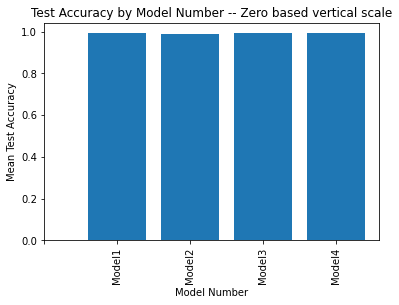

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

averages['model#'] = [1,2,3,4]

plt.bar(averages['model#'], averages['test_accuracy'])
plt.title("Test Accuracy by Model Number -- Zero based vertical scale")
plt.xlabel("Model Number")
plt.ylabel("Mean Test Accuracy")
bars_label = ['','Model1','Model2','Model3','Model4']
plt.xticks(range(len(bars_label)), bars_label, rotation='vertical')
plt.show()

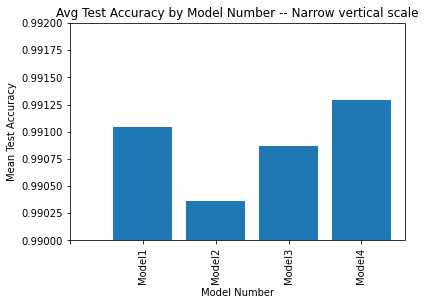

In [18]:
averages['model#'] = [1,2,3,4]

plt.bar(averages['model#'], averages['test_accuracy'])
plt.title("Avg Test Accuracy by Model Number -- Narrow vertical scale")
plt.xlabel("Model Number")
plt.ylabel("Mean Test Accuracy")
bars_label = ['','Model1','Model2','Model3','Model4']
plt.xticks(range(len(bars_label)), bars_label, rotation='vertical')
plt.ylim(0.990, 0.992)
plt.show()

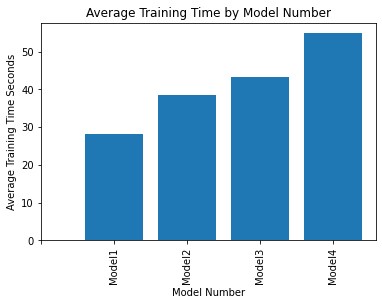

In [19]:
averages['model#'] = [1,2,3,4]

plt.bar(averages['model#'], averages['training_time'])
plt.title("Average Training Time by Model Number")
plt.xlabel("Model Number")
plt.ylabel("Average Training Time Seconds")
bars_label = ['','Model1','Model2','Model3','Model4']
plt.xticks(range(len(bars_label)), bars_label, rotation='vertical')
plt.show()

## What conclusions can we draw about relative model performance?

The average test accuracy measurements of the four models appear to be very close. Model4 average accuracy is slightly higher than Model1 at 0.991292 versus 0.991043, but is this significant?

In [7]:
## Here we separate the observations of each model into 4 separate data frames, for easier pair-wise comparisons
def model_data(df,model_name):
    return df[df['model_name']==model_name][['training_time','test_accuracy']]

model1 = model_data(df, 'model1')
model2 = model_data(df, 'model2')
model3 = model_data(df, 'model3')
model4 = model_data(df, 'model4')

In [8]:
from scipy.stats import ttest_ind

def run_ttest(df1, df2, column):
    """
    This method runs a 2-sided TTest for difference of the means of
    a selected column  from two corresponding data frames.
    """
    data1 = df1[column]
    mean1 = data1.mean()
    data2 = df2[column]
    mean2 = data2.mean()
    n = len(data1)
    pvalue = ttest_ind(data1, data2, equal_var=False).pvalue
    msg = f'Comparing {n} observations of mean {mean1:8.6f} to mean {mean2:8.6f}  {pvalue=:9.6f}'
    msg2 = None
    if pvalue <= 0.05:
        msg2 = ' appears to be significant.'
    else:
        msg2 = ' is NOT significant'
    display(msg+msg2)

### Now we can easily run a 2-sided TTest between mean values of any two models. 

Comparing test_accuracy of Model4 to Model1

In [13]:
run_ttest(model4, model1, 'test_accuracy')

'Comparing 60 observations of mean 0.991292 to mean 0.991043  pvalue= 0.327403 is NOT significant'

Comparing training_time of Model4 to Model1

In [14]:
run_ttest(model4, model1, 'training_time')

'Comparing 60 observations of mean 54.827480 to mean 28.130841  pvalue= 0.000000 appears to be significant.'

Model1 has slightly better accuracy than Model2. We can show that this small difference is statistically significant.

In [15]:
run_ttest(model1, model2, 'test_accuracy')

'Comparing 60 observations of mean 0.991043 to mean 0.990360  pvalue= 0.002201 appears to be significant.'

In [16]:
run_ttest(model1, model2, 'training_time')

'Comparing 60 observations of mean 28.130841 to mean 38.404469  pvalue= 0.000000 appears to be significant.'

At this point we can say that Model1 is slightly more accurate than Model2. There is not enough evidence to say that Model4 is more accurate than Model1. The test accuracy of all 4 models is very close. But there is strong evidence that the training times of the 4 models are different in every case. Model1 is the clear winner with an average training time of about 28 seconds.

### Conclusions

We started with a baseline model of a dense network with no hidden layers and got an accuracy of about 0.922 on classification of the MNIST digits data set.

We compared this to range of deeper fully connected networds having 1 to 4 hidden layers, with 64, 128, or 192 units per hidden layer. These configurations were tested with an SGD optimiser, an Adam optimizer, and an Adam optimizer with Dropout layers. All of these models had test accuracy in the range about 0.966 to 0.980. The most accurate configuration appeared to be using the Adam optimizer with 1 hidden layer of 192 units. Although the test accuracy measurements where all similar there was a large range of model training times from 10.6 seconds to 312 seconds. The choice of optimizer made a huge difference in training time to reach a similar level of accuracy. The shortest training time was achieved with the Adam optimizer and a network having 2 hidden layers of 192 units. Each specific configuration was only tested once, so we cannot be sure that a given configuration would always perform better.

We next compared four configurations of CNN networks. We started with a configuration given in reference 3 (Model1) nd then designed 3 plausible variations on the CNN model. All of the CNN models performed with consistent test accuracy in the range of 0.9903 to 0.9913 . We collected 60 observations of training time and test accuracy for each model. Model4 was slightly more accurate than Model1 on average, but the difference was not statistically significant. The difference in training times between the models was significant, and Model1 had the best peformance in terms of shortest training time to reach a given accuracy.

## References

1. MNIST digits classification dataset https://keras.io/api/datasets/mnist/

1. <ins>Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow</ins>, 2nd Edition by Aurelien Geron

1. <ins>Deep Learning with Tensorflow 2 and Keras</ins>, 2nd Edition by Antonio Gulli, Amita Kapoor, Sujit Pal

1. Understanding and Implementing LeNet-5 CNN Architecture (Deep Learning) by Richmond Alake https://towardsdatascience.com/understanding-and-implementing-lenet-5-cnn-architecture-deep-learning-a2d531ebc342

1. GradientBased Learning Applied to Document Recognition by Yann LeCun Leon Bottou Yoshua Bengio and Patrick Haner http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf